# MTE203 Applications of MLP's in Sports Betting

In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn import preprocessing

In [2]:
def percentError(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
FILE_PATH = '../data/nbaCleanedData.csv'
nbaDf = pd.read_csv(FILE_PATH)

In [4]:
nbaDf

,index,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,...,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,PTS_total,point_average_last10,point_againts_average_last10,away_point_average_last10,away_point_againts_average_last10
0,0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,...,0.815,0.321,23.0,44.0,1,243.0,118.40,114.40,108.45,119.75
1,1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,...,0.765,0.333,20.0,37.0,1,232.0,116.05,118.10,113.05,114.95
2,2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,...,0.682,0.433,20.0,46.0,1,220.0,106.70,103.45,113.95,111.80
3,8,2022-12-21,22200472,Final,1610612745,1610612753,2022,1610612745,110.0,0.466,...,0.697,0.297,19.0,45.0,0,226.0,110.85,114.90,108.30,113.95
4,12,2022-12-21,22200476,Final,1610612746,1610612766,2022,1610612746,126.0,0.506,...,0.759,0.290,25.0,40.0,1,231.0,109.30,107.75,111.70,119.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16788,9426,2010-10-05,11000005,Final,1610612745,1610612753,2010,1610612745,88.0,0.395,...,0.867,0.286,22.0,41.0,0,185.0,105.75,107.10,101.60,92.05
16789,9427,2010-10-05,11000010,Final,1610612742,1610612764,2010,1610612742,94.0,0.438,...,0.690,0.278,19.0,37.0,0,191.0,100.00,96.45,94.00,99.80
16790,9428,2010-10-05,11000008,Final,1610612757,1610612746,2010,1610612757,115.0,0.481,...,0.739,0.250,17.0,35.0,1,201.0,96.15,96.05,95.50,106.25
16791,9429,2010-10-05,11000009,Final,1610612758,1610612756,2010,1610612758,109.0,0.517,...,0.700,0.125,19.0,36.0,1,204.0,96.00,101.40,107.20,101.45


## Data Cleaning / Engineering

In [5]:
nbaDf.columns

Index(['index', 'GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS', 'PTS_total', 'point_average_last10',
       'point_againts_average_last10', 'away_point_average_last10',
       'away_point_againts_average_last10'],
      dtype='object')

In [6]:
encoder = preprocessing.OneHotEncoder()

oheHomeTeamId = encoder.fit_transform(nbaDf[["HOME_TEAM_ID"]]).toarray()
oheAwayTeamId = encoder.fit_transform(nbaDf[["VISITOR_TEAM_ID"]]).toarray()
OheTeamHomeId = encoder.fit_transform(nbaDf[["TEAM_ID_home"]]).toarray()
OheTeamAwayId = encoder.fit_transform(nbaDf[["TEAM_ID_away"]]).toarray()
nbaDf["SEASON"] = nbaDf["SEASON"] - 2010

/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `

In [7]:
nbaDf.columns

Index(['index', 'GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS', 'PTS_total', 'point_average_last10',
       'point_againts_average_last10', 'away_point_average_last10',
       'away_point_againts_average_last10'],
      dtype='object')

In [8]:
oheTeamHomeIdDf = pd.DataFrame(oheHomeTeamId)
oheAwayTeamIdDf = pd.DataFrame(oheAwayTeamId)
OheTeamHomeIdDf = pd.DataFrame(OheTeamHomeId)
OheTeamAwayIdDf = pd.DataFrame(OheTeamAwayId)
nbaDf = pd.concat([nbaDf,oheTeamHomeIdDf], axis=1)
nbaDf = pd.concat([nbaDf,oheAwayTeamIdDf], axis=1)
nbaDf = pd.concat([nbaDf,OheTeamHomeIdDf], axis=1)
nbaDf = pd.concat([nbaDf,OheTeamAwayIdDf], axis=1)

In [9]:
nbaDf.drop(['HOME_TEAM_ID', 'VISITOR_TEAM_ID', "TEAM_ID_home", "TEAM_ID_away"], axis=1, inplace=True)

In [10]:
nbaDf.columns = nbaDf.columns.astype(str)
nbaDf = nbaDf.dropna()

## Train Test Split

In [11]:
y = nbaDf["PTS_total"]
nbaDf = nbaDf.drop(columns=['PTS_total', 'PTS_home', 'PTS_away', 'index', 'GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT'])

testSplit = len(nbaDf) - int(len(nbaDf)*0.8)

xTrain = nbaDf.iloc[testSplit:]
xValid = nbaDf.iloc[:testSplit]
yTrain = y.iloc[testSplit:]
yValid = y.iloc[:testSplit]

## MLP Regression

In [12]:
regressor = MLPRegressor(hidden_layer_sizes=[100], activation='relu', solver='adam', learning_rate='constant', max_iter=1000, learning_rate_init=0.001, shuffle=True, random_state=345, early_stopping=True).fit(
    xTrain, yTrain
)

mlpPred = regressor.predict(xValid)
mlpMAE = mean_absolute_error(yValid, mlpPred)
mlpR2 = r2_score(yValid, mlpPred)

/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

## Analysis of Results

In [13]:
print("mae",mlpMAE)
print("R^2", mlpR2)
print("Percent Error", percentError(yValid, mlpPred))

mae 8.995316404796087
R^2 0.6732631899947961
Percent Error 4.075639877120809


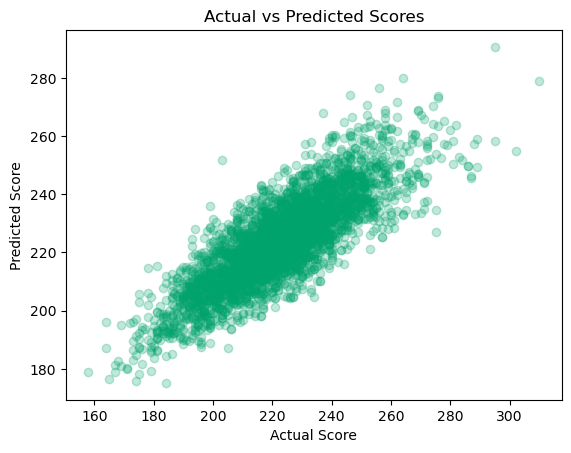

In [14]:
import matplotlib.pyplot as plt

plt.scatter(yValid, mlpPred, marker="o", alpha=0.25, color="#00A36C")
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Scores')
plt.show()


In [20]:
xValid

,SEASON,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,...,20,21,22,23,24,25,26,27,28,29
0,12,0.484,0.926,0.382,25.0,46.0,0.478,0.815,0.321,23.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12,0.488,0.952,0.457,16.0,40.0,0.561,0.765,0.333,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12,0.482,0.786,0.313,22.0,37.0,0.470,0.682,0.433,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12,0.466,0.647,0.395,22.0,49.0,0.451,0.697,0.297,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,0.506,0.913,0.469,29.0,48.0,0.402,0.759,0.290,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3354,9,0.462,0.909,0.404,26.0,48.0,0.466,0.581,0.364,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3355,9,0.448,0.750,0.417,23.0,49.0,0.484,0.905,0.259,29.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3356,9,0.429,0.955,0.383,28.0,35.0,0.450,0.783,0.372,23.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3357,9,0.429,0.719,0.333,33.0,43.0,0.469,0.792,0.452,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
len(mlpPred)

3359

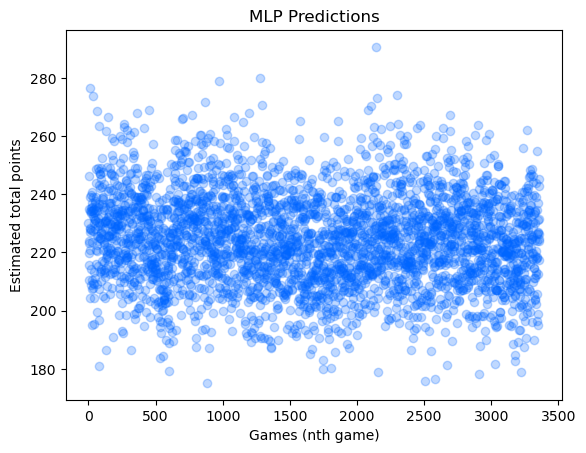

<Figure size 640x480 with 0 Axes>

In [42]:
plt.style.context("ggplot")
plt.scatter(range(len(mlpPred)), mlpPred, marker="o", alpha=0.25,color = "#0066ff")
plt.xlabel("Games (nth game)")
plt.ylabel("Estimated total points")
plt.title("MLP Predictions")
fig6 = plt.figure();

Average Error of model: 1.413323584592423


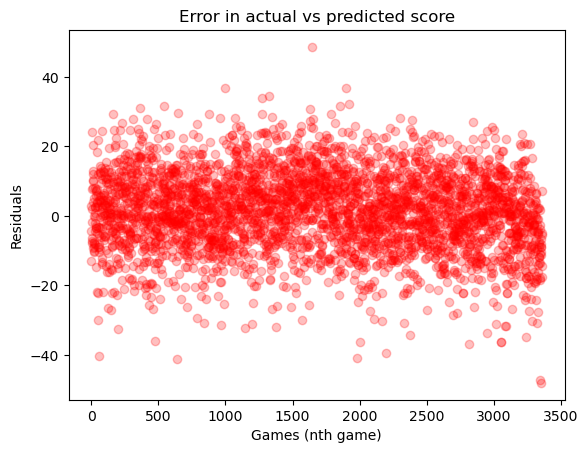

<Figure size 640x480 with 0 Axes>

In [36]:
residuals = []
for i in range(len(mlpPred)):
    residuals.append((mlpPred[i] - yValid.iloc[i]))
print ("Average Error of model:",sum(residuals)/len(residuals))
plt.style.context("ggplot")
plt.scatter(range(len(residuals)), residuals, marker="o", alpha=0.25, color="#ff0000")
plt.xlabel("Games (nth game)")
plt.ylabel("Residuals")
plt.title("Error in actual vs predicted score")
fig7 = plt.figure();

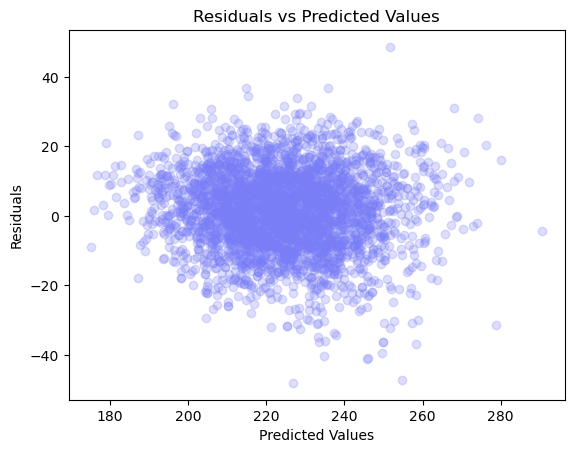

In [43]:
plt.scatter(mlpPred, residuals, marker="o", alpha=0.25, color="#797EF6")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


## Comapring MAE with Betting Lines

In [17]:
bettingLines = pd.read_csv("../data/bets.csv")

bettingLines["realTotal"] = bettingLines["points"] + bettingLines["o:points"]

print(mean_absolute_error(bettingLines["realTotal"], bettingLines["total"]))

13.428425374122632


/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/danielrh/miniconda3/envs/MTE203/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `